# IMPORTING LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('C:\\Users\\Admin\\Desktop\\churn_prediction (1).csv')

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
df.shape

(28382, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [6]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [7]:
df.isnull()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28380,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

# HANDLING MISSING VALUES

In [9]:
missing_cols = ['dependents', 'city', 'days_since_last_transaction','gender','occupation']


In [10]:
# For demonstration, let's fill missing values with the mean for numerical columns and mode for categorical columns
for col in missing_cols:
    if df[col].dtype == 'object':
        # For categorical columns, fill missing values with mode
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        # For numerical columns, fill missing values with mean
        df[col].fillna(df[col].mean(), inplace=True)

In [11]:
for col in missing_cols:
    # Count the occurrences of missing values in each column
    missing_count = df[col].isnull().sum()
    print(f"Column '{col}' has {missing_count} missing values")

Column 'dependents' has 0 missing values
Column 'city' has 0 missing values
Column 'days_since_last_transaction' has 0 missing values
Column 'gender' has 0 missing values
Column 'occupation' has 0 missing values


In [12]:
# Verify that missing values have been filled
print(df.isnull().sum())

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64


# DATA PREPROCESSING

In [13]:
df=pd.get_dummies(data=df,columns=['occupation','gender'],drop_first=True)
df.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,gender_Male
0,1,3135,66,0.000000,187.000000,2,755,224.000000,1458.71,1458.71,...,0.20,0.20,1458.71,1458.71,0,0,0,1,0,1
1,2,310,35,0.000000,796.109576,2,3214,60.000000,5390.37,8704.66,...,5486.27,100.56,6496.78,8787.61,0,0,0,1,0,1
2,4,2356,31,0.000000,146.000000,2,41,69.997814,3913.16,5815.29,...,6046.73,259.23,5006.28,5070.14,0,0,1,0,0,1
3,5,478,90,0.347236,1020.000000,2,582,147.000000,2291.91,2291.91,...,0.47,2143.33,2291.91,1669.79,1,0,0,1,0,1
4,6,2531,42,2.000000,1494.000000,3,388,58.000000,927.72,1401.72,...,588.62,1538.06,1157.15,1677.16,1,0,0,1,0,1


In [14]:
x=df.drop('churn',axis=1)
y=df['churn']

# MODEL TRAINING

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 1. LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,y_pred1)*100)
print('Confusion matrix :\n',confusion_matrix(y_test,y_pred1))
print('Classification report:\n',classification_report(y_test,y_pred1))

Accuracy score : 83.4836527621195
Confusion matrix :
 [[5768   57]
 [1115  156]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      5825
           1       0.73      0.12      0.21      1271

    accuracy                           0.83      7096
   macro avg       0.79      0.56      0.56      7096
weighted avg       0.82      0.83      0.78      7096



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2. RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=10)
clf.fit(x_train,y_train)
y_pred2=clf.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,y_pred2)*100)
print('Confusion matrix :\n',confusion_matrix(y_test,y_pred2))
print('Classification report:\n',classification_report(y_test,y_pred2))

Accuracy score : 86.75310033821872
Confusion matrix :
 [[5621  204]
 [ 736  535]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      5825
           1       0.72      0.42      0.53      1271

    accuracy                           0.87      7096
   macro avg       0.80      0.69      0.73      7096
weighted avg       0.86      0.87      0.85      7096



# 3. DECISION TREE

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
clf_gini.fit(x_train,y_train)
y_pred3=clf_gini.predict(x_test)
print('Accuracy score :',accuracy_score(y_test,y_pred3)*100)
print('Confusion matrix :\n',confusion_matrix(y_test,y_pred3))
print('Classification report:\n',classification_report(y_test,y_pred3))

Accuracy score : 84.93517474633596
Confusion matrix :
 [[5713  112]
 [ 957  314]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91      5825
           1       0.74      0.25      0.37      1271

    accuracy                           0.85      7096
   macro avg       0.80      0.61      0.64      7096
weighted avg       0.84      0.85      0.82      7096



# HYPERPARAMETER TUNING

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

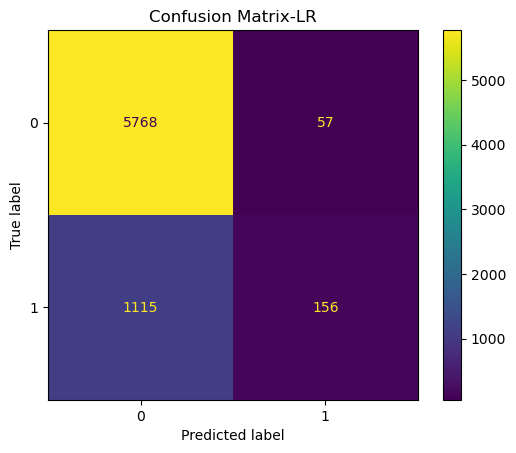

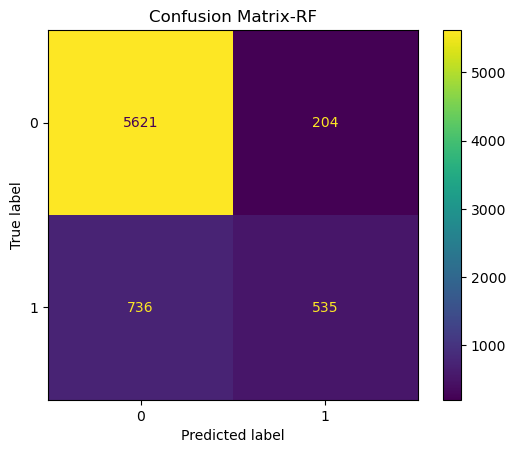

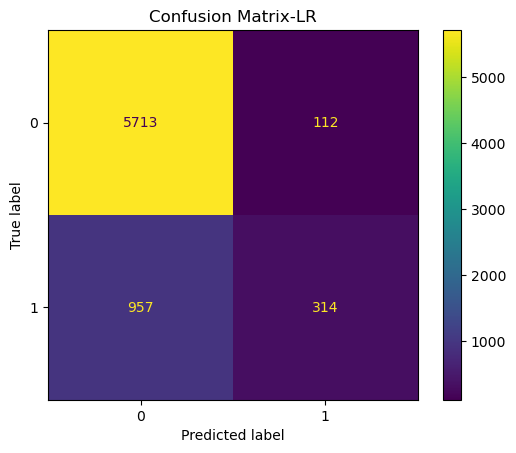

In [21]:
# visualizing confusion metrics for Logistic Regression

disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred1))
disp.plot()
plt.title('Confusion Matrix-LR')
plt.show()

# visualizing confusion metrics for Random Forest

disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred2))
disp.plot()
plt.title('Confusion Matrix-RF')
plt.show()

# visualizing confusion metrics for Decision Tree

disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred3))
disp.plot()
plt.title('Confusion Matrix-LR')
plt.show()


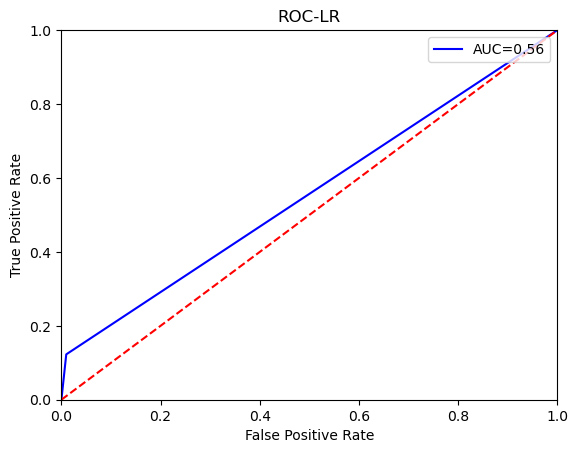

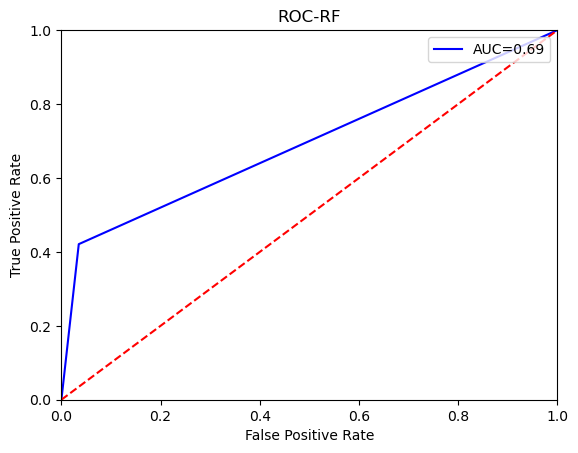

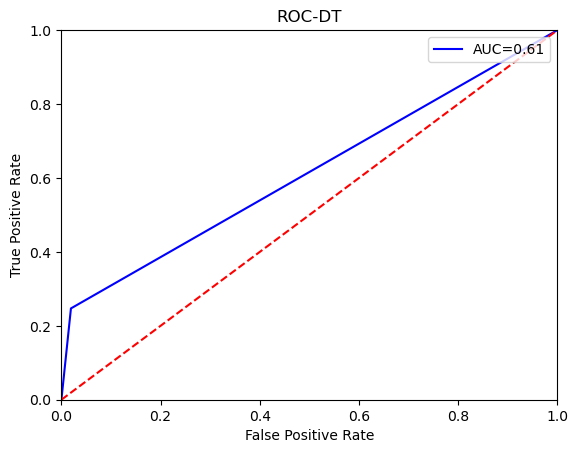

In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt

# AUC ROC - LR
# calculate the fpr and tpr for all threshold of the classification

fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred1)
roc_auc= metrics.auc(fpr,tpr)

plt.title('ROC-LR')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='upper right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all threshold of the classification

fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred2)
roc_auc=metrics.auc(fpr,tpr)


plt.title('ROC-RF')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='upper right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# AUC ROC - DT
# calculate the fpr and tpr for all threshold of the classification

fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred3)
roc_auc=metrics.auc(fpr,tpr)

plt.title('ROC-DT')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='upper right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



Random Forest: It has the highest AUC value (0.69) among the three models you've evaluated. This indicates that the random forest model performs the best in distinguishing between churned and non-churned customers.

Decision Tree: It has a higher AUC value (0.61) compared to logistic regression, but lower than random forest. This suggests that the decision tree model performs better than logistic regression but not as well as random forest.

Logistic Regression: It has the lowest AUC value (0.56) among the three models. While logistic regression can still provide insights into the data and make predictions, its performance in terms of AUC is the lowest in this comparison.

Based on this comparison, if your primary goal is to maximize predictive performance, you would prioritize the random forest model

# This indicates that the random forest performs well than LG and DT

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
x=df.drop('churn',axis=1)
y=df['churn']
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [24]:
clf.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [25]:
#score on train data
clf.score(x_train, y_train)


1.0

In [26]:
#score on test data
clf.score(x_test, y_test)


0.8663026246256825

In [27]:
# Evaluate the model
train_accuracy = clf.score(x_train, y_train)
test_accuracy = clf.score(x_test, y_test)

# Print the evaluation results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.8663026246256825


In [28]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(clf, x_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.86390663 0.86280555 0.866329   0.85862145 0.86434706]
Mean Cross-Validation Score: 0.8632019378991412


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with adjusted hyperparameters
clf = RandomForestClassifier(
    n_estimators=100,  # You may reduce the number of trees
    max_depth=10,       # Limit the maximum depth of the trees
    min_samples_split=5,   # Increase minimum samples required for a split
    min_samples_leaf=2,    # Increase minimum samples required for a leaf node
    random_state=42
)

# Train the classifier
clf.fit(x_train, y_train)

# Evaluate the model on training and test sets
train_accuracy = clf.score(x_train, y_train)
test_accuracy = clf.score(x_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.8961462232988329
Test Accuracy: 0.8629557865069579


In [30]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ensure that the shapes of the training and test sets are consistent
print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)


Training data shape: (22705, 23) (22705,)
Test data shape: (5677, 23) (5677,)


In [31]:
#looking at the feature importance
clf.feature_importances_

array([0.0191104 , 0.02836601, 0.01651247, 0.00496168, 0.01600814,
       0.0054422 , 0.02049923, 0.02270102, 0.29480854, 0.06443307,
       0.05108065, 0.05051637, 0.029339  , 0.03108076, 0.10088392,
       0.05440021, 0.13117959, 0.05030048, 0.00081034, 0.00177499,
       0.00232963, 0.00105274, 0.00240856])

In [32]:
#feature importance against each variable
pd.Series(clf.feature_importances_, index=x_train.columns)

customer_id                       0.019110
vintage                           0.028366
age                               0.016512
dependents                        0.004962
city                              0.016008
customer_nw_category              0.005442
branch_code                       0.020499
days_since_last_transaction       0.022701
current_balance                   0.294809
previous_month_end_balance        0.064433
average_monthly_balance_prevQ     0.051081
average_monthly_balance_prevQ2    0.050516
current_month_credit              0.029339
previous_month_credit             0.031081
current_month_debit               0.100884
previous_month_debit              0.054400
current_month_balance             0.131180
previous_month_balance            0.050300
occupation_retired                0.000810
occupation_salaried               0.001775
occupation_self_employed          0.002330
occupation_student                0.001053
gender_Male                       0.002409
dtype: floa

In [40]:
# Initialize and train a Random Forest Classifier with balanced class weights and a specified random seed

rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_classifier.fit(x_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)